### 災害タイプ別 国別死亡者数ランキングの自動抽出と可視化

In [9]:
import pandas as pd

emdat = pd.read_csv("emdat.csv")
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


各列名を日本語表記にする。

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント（Windows向け）
plt.rcParams['font.family'] = 'MS Gothic'

# CSV読み込み
emdat = pd.read_csv('emdat.csv')

# 列名を日本語に変更
emdat = emdat.rename(columns={
    'Disaster Subgroup': '災害サブグループ',
    'Disaster Type': '災害タイプ',
    'Disaster Subtype': '災害サブタイプ',
    'ISO': 'ISOコード',
    'Country': '国名',
    'Subregion': '小地域',
    'Region': '地域',
    'Latitude': '緯度',
    'Longitude': '経度',
    'Start Year': '開始年',
    'Total Deaths': '死亡者数'
})

# 確認
emdat.head()


,災害サブグループ,災害タイプ,災害サブタイプ,ISOコード,国名,小地域,地域,緯度,経度,開始年,死亡者数
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


災害タイプについて、発生国とその死亡者数の上位3位を表示する。

In [11]:
import pandas as pd
import numpy as np

# emdat.csv を読み込む
df = pd.read_csv("emdat.csv")

# 死亡者数 ('Total Deaths') が NaN の行を 0 で埋める
df['Total Deaths'] = df['Total Deaths'].fillna(0)

# Function（関数）の作成 - to_string() を使用して依存関係エラーを回避
def display_top3_deadliest_countries(df, disaster_type):
    """
    指定された災害タイプについて、総死亡者数が最も多い国を上位3位まで表示する関数。
    """
    # 1. 該当する災害タイプでデータをフィルタリング
    df_filtered = df[df['Disaster Type'] == disaster_type]

    # 該当するデータがない場合はメッセージを出力
    if df_filtered.empty:
        print(f"\n🚨 警告: 災害タイプ '{disaster_type}' に該当するデータは見つかりませんでした。")
        return None

    # 2. 国 (Country) ごとに死亡者数 (Total Deaths) の合計を計算
    df_top = df_filtered.groupby('Country')['Total Deaths'].sum().reset_index()

    # 3. 合計死亡者数が多い順にソートし、上位3位を抽出
    df_top = df_top.sort_values(by='Total Deaths', ascending=False).head(3)

    # 4. 結果の表示
    print(f"\n--- 災害タイプ: '{disaster_type}' の総死亡者数 上位3国 ---")
    if not df_top.empty:
        # Total Deaths を整数型に変換
        df_top['Total Deaths'] = df_top['Total Deaths'].astype(int)
        
        # インデックスをリセットして順位を追加
        df_top = df_top.reset_index(drop=True)
        df_top.index = df_top.index + 1
        df_top.index.name = 'Rank'
        
        # to_string() を使用して、外部ライブラリ（tabulate）への依存を回避
        print(df_top.to_string(index=True))
    else:
        print("該当する国データがありませんでした。")

    return df_top

In [12]:
# 'Flood' (洪水) のデータを取得
flood_top3 = display_top3_deadliest_countries(df, 'Flood')


--- 災害タイプ: 'Flood' の総死亡者数 上位3国 ---
         Country  Total Deaths
Rank                          
1          China       6622672
2          India         81038
3     Bangladesh         53267


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

df = pd.read_csv("emdat.csv")

df['Total Deaths'] = df['Total Deaths'].fillna(0)
df['Total Deaths'] = df['Total Deaths'].astype(int)

In [14]:
def plot_top3_deadliest_countries(df, disaster_type, ax):
    """
    指定された災害タイプの上位3国の総死亡者数を計算し、指定されたサブプロットに棒グラフを描画する関数。

    Parameters
    ----------
    df : pandas.DataFrame
        分析対象のデータフレーム。
    disaster_type : str
        表示したい災害のタイプ。
    ax : matplotlib.axes.Axes
        グラフを描画するサブプロットオブジェクト。

    Returns
    -------
    None
    """
    # 1. 該当する災害タイプでデータをフィルタリング
    df_filtered = df[df['Disaster Type'] == disaster_type]

    # 該当データがない、または死亡者数が0のデータしかない場合は描画をスキップ
    if df_filtered.empty or df_filtered['Total Deaths'].sum() == 0:
        ax.text(0.5, 0.5, f"'{disaster_type}' のデータなし、または死亡者数が0", 
                ha='center', va='center', fontsize=10)
        ax.set_title(f" {disaster_type}", fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        return

    # 2. 国 (Country) ごとに死亡者数 (Total Deaths) の合計を計算
    df_top = df_filtered.groupby('Country')['Total Deaths'].sum().reset_index()

    # 3. 合計死亡者数が多い順にソートし、上位3位を抽出
    df_top = df_top.sort_values(by='Total Deaths', ascending=False).head(3)
    
    # 4. グラフの描画
    countries = df_top['Country']
    deaths = df_top['Total Deaths']
    
    # 棒グラフを作成
    ax.bar(countries, deaths, color='skyblue')
    
    # ラベルとタイトルを設定
    ax.set_title(f" {disaster_type}: 上位3国 (総死亡者数)", fontsize=12)
    ax.set_ylabel("総死亡者数 (Total Deaths)", fontsize=9)
    ax.ticklabel_format(style='plain', axis='y') # y軸の表記を科学的記法から標準的な数値に
    
    # X軸のラベルを斜めにして見やすくする
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

発生数上位4位までの災害タイプに関する発生国と死亡者数の上位3位までを表示するグラフを制作する。

 発生件数に基づいて選択された上位4の災害タイプ: ['Flood', 'Storm', 'Earthquake', 'Epidemic']


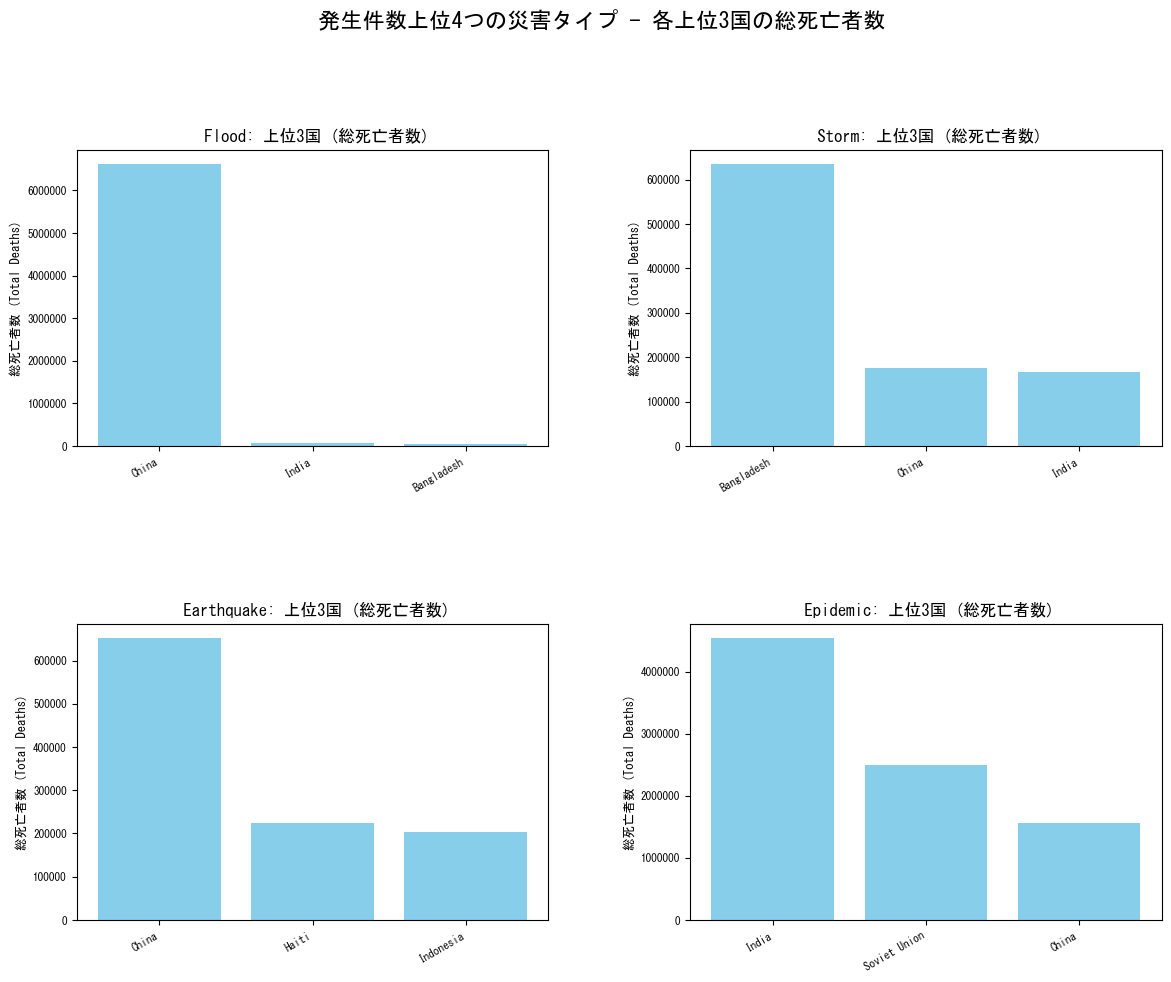

In [15]:
# グラフ化したい数
num_plots = 4

# 1. データ内で発生件数が最も多い上位4つの災害タイプを抽出
top_disaster_counts = df['Disaster Type'].value_counts().head(num_plots)
top_disasters = top_disaster_counts.index.tolist()

print(f" 発生件数に基づいて選択された上位{num_plots}の災害タイプ: {top_disasters}")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.3) # グラフ間のスペースを調整

fig.suptitle('発生件数上位4つの災害タイプ - 各上位3国の総死亡者数', fontsize=16, y=1.02)


# for ループによる自動描画
for i, disaster in enumerate(top_disasters):
    # i を使って、axes のどの位置に描画するかを計算
    row = i // 2 # 0, 0, 1, 1
    col = i % 2  # 0, 1, 0, 1
    
    # 関数を呼び出し、対応するサブプロット (axes[row, col]) にグラフを描画
    plot_top3_deadliest_countries(df, disaster, axes[row, col])

plt.show()

##### 考察
4つのグラフを見て、総死亡者数が多いのが「中国」の率が高かった。その理由として、中国の人口が多いので、被害者の数が多いからだと考えられる。